# FTG generation from a PM
In this example notebook, we show how to generate an FTG out of a PM.

## Initialization
As usual, we start with the initialization of the Modelverse and the definition of the *view* operation for SVG.

In [1]:
import sys
sys.path.append("../wrappers")
from modelverse import *

init()
login(None, None)

from IPython.display import SVG, display

def view(model_name):
    svg = SVG()
    svg.data = show(model_name)
    display(svg)

## Add models
We add the models that we will be using: the process model that we want to fetch the FTG of, and we also load the FTG formalism.

In [2]:
model_add("~/models/pm_powerwindow", "formalisms/ProcessModel", open("../models/PowerWindow/PM_analyze.mvc", 'r').read())
model_add("~/formalisms/FormalismTransformationGraph", "formalisms/SimpleClassDiagrams", open("../models/FTGPM/metamodels/FTG_MM.mvc", 'r').read())

## Add transformation
We now add the transformation that will generate the FTG part.

In [3]:
def add_traceability(model):
    instantiate(model, "Association", edge=("PM/Exec", "FTG/Activity"), ID="activity_link")
    instantiate(model, "Association", edge=("PM/Data", "FTG/Formalism"), ID="formalism_link")

transformation_add_AL({"PM": "formalisms/ProcessModel"}, {"FTG": "~/formalisms/FormalismTransformationGraph"}, "~/models/generate_FTG", open("../models/FTGPM/transformations/PM_to_FTG.alc", 'r').read(), add_traceability)

## Execute transformation
Finally we execute the transformation, thereby generating the FTG.
The FTG model is subsequently visualized.

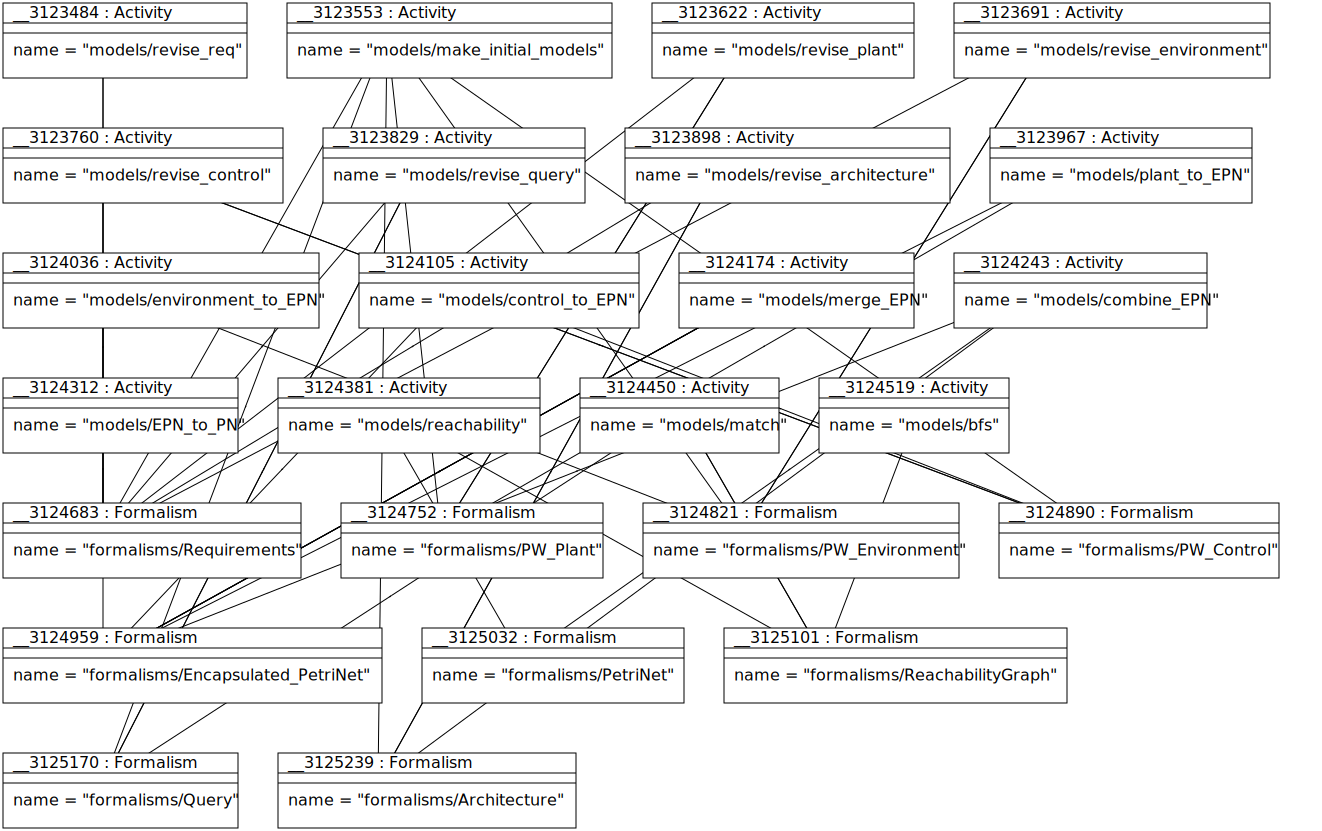

In [4]:
transformation_execute_AL("~/models/generate_FTG", {"PM": "~/models/pm_powerwindow"}, {"FTG": "~/models/ftg_powerwindow"})
view("~/models/ftg_powerwindow")